In [ ]:
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
import more_itertools as mit
import pandas as pd

from game import *
from player import (Player, RandomPlayer, MaxPlayer, MinPlayer, NNPlayer, 
BonusCravingPlayer, MalusAdverse, GetRidOfBadCards, Robot, MCPlayer, SARSAPlayer,
BestAllocationPlayer,BASfusionPlayer,threeBASfusionPlayer)

from analyse import read_game, plot_win_over_time

import warnings
warnings.filterwarnings("ignore")

State space:
- The current deck's card
- His remaining cards

In [ ]:
def match(n_player,n_cards,n_game,chosen_player_list,display_policy = False):
    game = Game(n_player, n_cards, n_game=n_game, random=True, verbose=False)
    for i,player in enumerate(chosen_player_list):
        game.player_list_[i] = player

    game_summary_list = []
    winner_list_list = []
    for _ in tqdm(range(n_game)):
        player_list, game_summary, winner_list = game.play()
        game_summary_list.append(game_summary)
        winner_list_list.append(list(map(str, winner_list)))
    with open(f"../data/game_summary/summary_{n_player}p_{n_game}g_{n_cards}c_example.json", "w+") as f:
        json.dump(
            {
                "player_list": list(map(str, player_list)),
                "game_summary_list": game_summary_list,
                "winner_list_list": winner_list_list,
            },
            f,
            indent=4,
        )

    player_list_nn, df_game_nn = read_game(f"../data/game_summary/summary_{n_player}p_{n_game}g_{n_cards}c_example.json", return_player=True)
    df_win = plot_win_over_time(df_game_nn, player_list=player_list_nn, window=300, display=False)
    df_reward = df_win.drop(columns=["game_winner"]).astype(int)
    df_reward = df_reward - 1/df_reward.shape[1]
    df_reward.cumsum().plot()
    plt.title("Cumulative sum of the reward")
    plt.show()

    if display_policy:
        return game.player_list_[-1].define_policy_from_Q(game.player_list_[-1].Q)

# MC VS random

100%|██████████| 40000/40000 [00:50<00:00, 797.31it/s]
Number of games: 40000


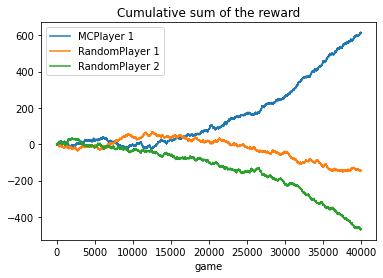

In [ ]:
match(n_player=3,n_cards=5,n_game=40000,chosen_player_list=[MCPlayer(name="1",n_cards=5)])

100%|██████████| 5000/5000 [00:01<00:00, 4044.59it/s]
Number of games: 5000


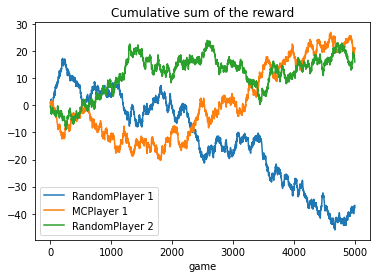

In [ ]:
policy = match(n_player=3,n_cards=1,n_game=10000,chosen_player_list=[MCPlayer(name="1",n_cards=1)],display_policy=True)

In [ ]:
col0 = [x[0] for x in list(policy.keys())]
col1 = [x[1] for x in list(policy.keys())]
col2 = [policy[x] for x in list(policy.keys())]
pol = pd.DataFrame([col0,col1,col2]).T
pol.columns = ["deck's card","hand","chosen card"]
pol

,deck's card,hand,chosen card
0,-1,"(1,)",1
1,-1,"(2,)",2
2,-1,"(1, 2)",2
3,-1,"(3,)",3
4,-1,"(1, 3)",3
5,-1,"(2, 3)",2
6,-1,"(1, 2, 3)",2
7,1,"(1,)",1
8,1,"(2,)",2
9,1,"(1, 2)",1


# SARSA VS random

100%|██████████| 50000/50000 [00:24<00:00, 2005.56it/s]
Number of games: 50000


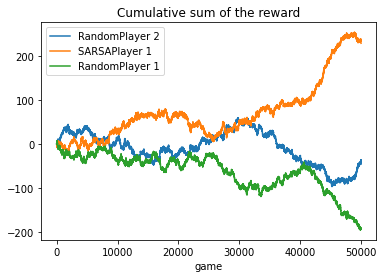

In [ ]:
match(n_player=3,n_cards=2,n_game=50000,chosen_player_list=[SARSAPlayer(name="1",n_cards=2)])

# MC VS SARSA

100%|██████████| 20000/20000 [00:15<00:00, 1330.22it/s]
Number of games: 20000


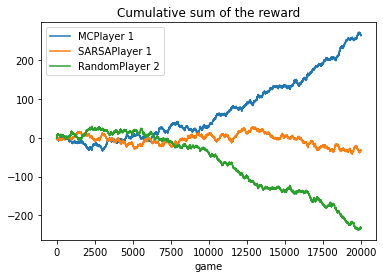

In [ ]:
match(n_player=3,n_cards=2,n_game=20000,chosen_player_list=[MCPlayer(name="1",n_cards=2),SARSAPlayer(name="1",n_cards=2)])

100%|██████████| 20000/20000 [00:13<00:00, 1526.69it/s]
Number of games: 20000


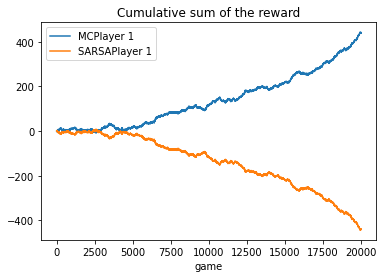

In [ ]:
match(n_player=2,n_cards=2,n_game=20000,chosen_player_list=[MCPlayer(name="1",n_cards=2),SARSAPlayer(name="1",n_cards=2)])

# MC VS MC

100%|██████████| 20000/20000 [00:14<00:00, 1340.22it/s]
Number of games: 20000


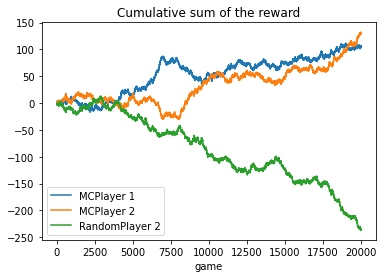

In [ ]:
match(n_player=3,n_cards=2,n_game=20000,chosen_player_list=[MCPlayer(name="1",n_cards=2),MCPlayer(name="2",n_cards=2)])

100%|██████████| 20000/20000 [00:13<00:00, 1505.29it/s]
Number of games: 20000


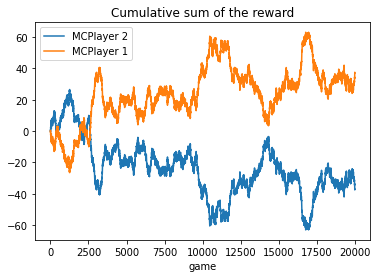

In [ ]:
match(n_player=2,n_cards=2,n_game=20000,chosen_player_list=[MCPlayer(name="1",n_cards=2),MCPlayer(name="2",n_cards=2)])

100%|██████████| 150000/150000 [01:38<00:00, 1519.37it/s]
Number of games: 150000


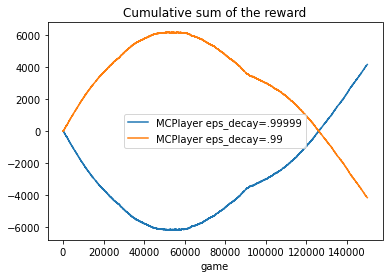

In [ ]:
match(n_player=2,n_cards=2,n_game=150000,chosen_player_list=[MCPlayer(name="eps_decay=.99999",n_cards=2,eps_decay=.99999),MCPlayer(name="eps_decay=.99",n_cards=2,eps_decay=.99)])

# MC VS bonus craving

100%|██████████| 40000/40000 [00:17<00:00, 2343.59it/s]
Number of games: 40000


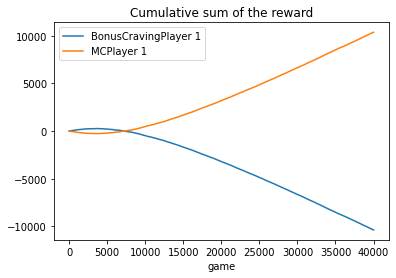

In [ ]:
match(n_player=2,n_cards=2,n_game=40000,chosen_player_list=[BonusCravingPlayer(name="1",n_cards=2),MCPlayer(name="1",n_cards=2,eps_decay=.9999)])

# MC VS BAS

100%|██████████| 40000/40000 [00:14<00:00, 2670.71it/s]
Number of games: 40000


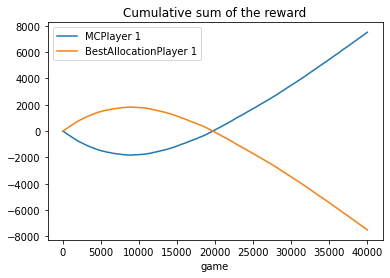

In [ ]:
policy = match(n_player=2,n_cards=2,n_game=40000,chosen_player_list=[BestAllocationPlayer(name="1",n_cards=2),MCPlayer(name="1",n_cards=2,eps_decay=.9999)],display_policy =True)

In [ ]:
col0 = [x[0] for x in list(policy.keys())]
col1 = [x[1] for x in list(policy.keys())]
col2 = [policy[x] for x in list(policy.keys())]
pol = pd.DataFrame([col0,col1,col2]).T
pol.columns = ["deck's card","hand","chosen card"]
pol

,deck's card,hand,chosen card
0,-2,"(1,)",1
1,-2,"(2,)",2
2,-2,"(1, 2)",1
3,-2,"(3,)",3
4,-2,"(1, 3)",3
...,...,...,...
373,4,"(1, 2, 4, 5, 6)",1
374,4,"(3, 4, 5, 6)",6
375,4,"(1, 3, 4, 5, 6)",6
376,4,"(2, 3, 4, 5, 6)",3


# MC VS BAS Bandit 

100%|██████████| 40000/40000 [00:22<00:00, 1760.24it/s]
Number of games: 40000


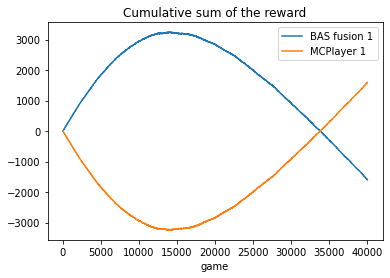

In [ ]:
match(n_player=2,n_cards=3,n_game=40000,chosen_player_list=[threeBASfusionPlayer(name="1",n_cards=3),MCPlayer(name="1",n_cards=3,eps_decay=.9999)])

# Find the best eps decay

100%|██████████| 20000/20000 [00:07<00:00, 2572.10it/s]
Number of games: 20000


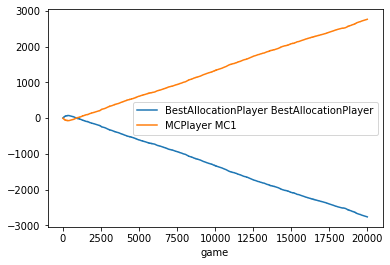

100%|██████████| 20000/20000 [00:07<00:00, 2673.58it/s]
Number of games: 20000


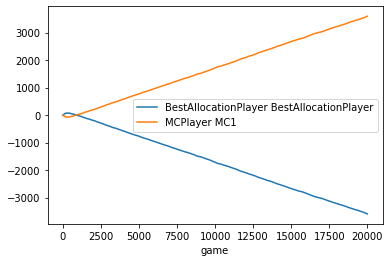

100%|██████████| 20000/20000 [00:07<00:00, 2550.51it/s]
Number of games: 20000


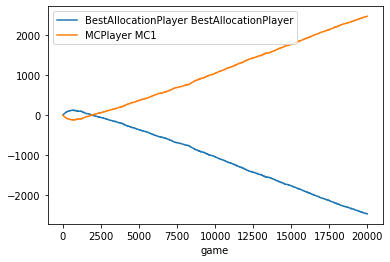

100%|██████████| 20000/20000 [00:07<00:00, 2687.48it/s]
Number of games: 20000


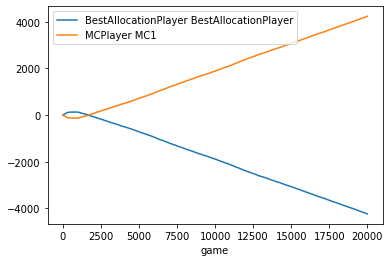

100%|██████████| 20000/20000 [00:07<00:00, 2656.26it/s]
Number of games: 20000


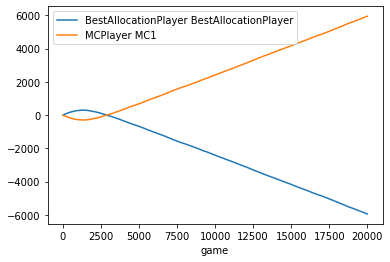

100%|██████████| 20000/20000 [00:07<00:00, 2718.97it/s]
Number of games: 20000


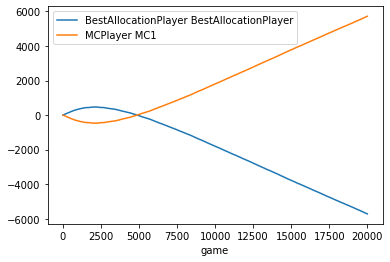

100%|██████████| 20000/20000 [00:08<00:00, 2445.72it/s]
Number of games: 20000


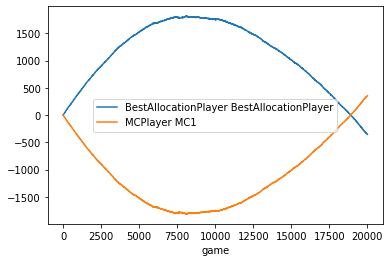

In [ ]:
n_player = 2
n_cards = 2

E = [0.99,0.992,0.995,0.997,0.999,0.9995,0.9999]
res = []

for eps_decay in E:
    n_game = 20000
    game = Game(n_player, n_cards, n_game=n_game, random=True, verbose=False)
    game.player_list_[0] = MCPlayer(name="MC1",n_cards=n_cards,eps_start=1, eps_decay=eps_decay)
    game.player_list_[1] = BestAllocationPlayer("BestAllocationPlayer",n_cards)

    game_summary_list = []
    winner_list_list = []
    for _ in tqdm(range(n_game)):
        player_list, game_summary, winner_list = game.play()
        game_summary_list.append(game_summary)
        winner_list_list.append(list(map(str, winner_list)))
    with open(f"../data/game_summary/summary_{n_player}p_{n_game}g_{n_cards}c_example.json", "w+") as f:
        json.dump(
            {
                "player_list": list(map(str, player_list)),
                "game_summary_list": game_summary_list,
                "winner_list_list": winner_list_list,
            },
            f,
            indent=4,
        )

    player_list_nn, df_game_nn = read_game(f"../data/game_summary/summary_{n_player}p_{n_game}g_{n_cards}c_example.json", return_player=True)
    df_win = plot_win_over_time(df_game_nn, player_list=player_list_nn, window=300, display=False)
    df_reward = df_win.drop(columns=["game_winner"]).astype(int)
    df_reward = df_reward - 1/df_reward.shape[1]
    df_reward.cumsum().plot()
    plt.show()

    res.append(np.argmax((np.abs(df_reward.cumsum().iloc[20:,0] - df_reward.cumsum().iloc[20:,1])<1))+0)

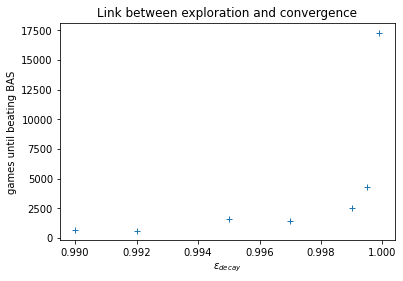

In [ ]:
plt.plot(E,res,'+')
plt.xlabel('$\epsilon_{decay}$')
plt.ylabel('games until beating BAS')
plt.title('Link between exploration and convergence')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c3570100-157e-4a3f-b5c9-ebc0870008b3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>